# Calculating the equation of the degree n+1 polynomial passes through n points in an algebraic varieties V[y-f(x)]

## Install Dependencies

In [25]:
!pip install --upgrade pip
!pip install sympy numpy matplotlib flask pyomo

ERROR! Session/line number was not unique in database. History logging moved to new session 33


## Import required Dependencies

In [3]:
import sympy as sp
from sympy.plotting import plot
from sympy.utilities.lambdify import lambdify
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy.parsing.sympy_parser import parse_expr
import flask as fk               ## for software development

## functions

In [107]:
def strtoexpr(s):
    '''
    convert a string object into expression
    '''
    num = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for i in np.arange(0, len(s)*2):
        try:
            if  s[i] in num and s[i+1] == 'x':
                s = s[:i+1] + '*' + s[i+1:]
            if s[i] == 'x' and s[i+1] == '^':
                s = s[:i+1] + "**" + s[i+2:]
        except:
            break
    print(s)
    expr = parse_expr(s, evaluate = False)
    return expr

def varieties(expr): # expr is an expression
    '''
    return and plot the varieties of y - f(x)
    '''
    v = sp.Eq(expr, 0)
    plot(expr,(x, -50, 50), show = True ,label = "y-f(x) = 0")
    return v
    
def curve(expr, xi, x):
    '''
    get the equation of the polynomial curve passes through xi on the varieties y-f(x), f(x) with expression expr
    '''
    divisorset = []
    for i in xi:
        f = x-i
        divisorset.append(f)
    divisor = 1
    for d in divisorset:
        divisor = divisor*d
    q, r = sp.div(expr, divisor)
    p1 = plot(expr, r, q,(x, -50, 50), show = True, lengend = True)
    return q, r

def tangent(expr, p):
    '''
    find the tangent at a point p using curve function
    '''
    xi = [float(p), float(p)]
    return curve(expr, xi, x)[1]

def diff_slope(expr, p):
    x = sp.symbols('x')
    t = sp.diff(expr, x, x=p)
    return t

## set the varieties and solve for x, y=0

input a polynomial with variable x:
 2x+3


2*x+3
[-3/2]


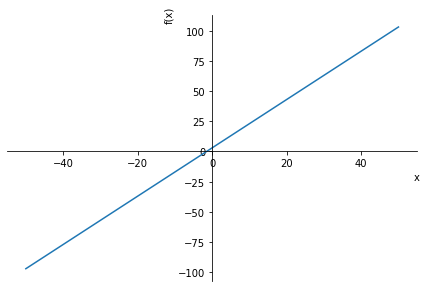

In [108]:
## set the variables x, y, z
x, y, z = sp.symbols('x y z')
## get user input as a polynomial equation
s = input("input a polynomial with variable x:\n")
## turn user input to sympy polynomial expression
f = strtoexpr(s)
deg = sp.degree(f, gen = x)
## print out x's for f(x) = 0
print(sp.solve(f))
## varieties V
V = varieties(f)
## indentation
print("\n")


please input the marked points {xi}:



 1


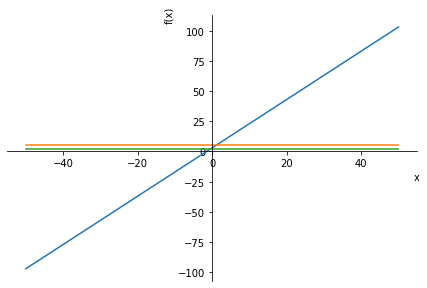

(2.00000000000000, 5.00000000000000)


The tangent at point:
 1


2


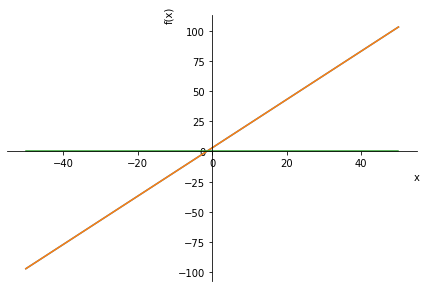

2.0*x + 3.0

In [109]:
## marked points set
ni = []
## get the generic marked points from users
print("please input the marked points {xi}:\n")
for i in np.arange(0, deg):
    try:
        a = float(input())
        ni.append(a)
    except:
        break
## The polynomial curve passes through the marked points
print(curve(f, ni, x))
## The tangent to the varieties at a point n
n = input("The tangent at point:\n")
print(diff_slope(f, n))
tangent(f, n)